## This script contains the following:
### 1. Importing libraries and data
### 2. Explore Relationships
  #### 2.1 Correlation Matrix
  #### 2.2 Pair Plots
  #### 2.3 Scatterplot
  #### 2.4 Categorical Plot
  #### 2.5 Choropleth Map
### 3. Supervised ML Regression Analysis
  #### 3.1 Check for outliers
  #### 3.2
### 4. Unsupervised ML Clustering Analysis
  #### 4.1The elbow technique
  #### 4.2. k-means clustering
  #### 4.3 Standardized Data

## 1. Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn # machine learning and model building library
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import folium
import json

In [3]:
# This ensures the graphs are displayed without the need to "call" them specifically.
%matplotlib inline 

In [9]:
# set path
path = r'C:\Users\ksmak\Desktop\CareerFoundary\Airbnb Berlin_ML'

In [7]:
# import json file
Berlin_geojson= r'C:\Users\ksmak\Desktop\CareerFoundary\Airbnb Berlin_ML\02 Data\Working Data\berlin_bezirke.geojson'

In [10]:
# import data file
df = pd.read_csv(os.path.join(path, '02 Data', 'Working Data', 'berlin_weekdays.csv'))

In [ ]:
# import data file
df = pd.read_csv(os.path.join(path, '02 Data', 'Working Data', 'berlin_weekdays.csv'))

In [42]:
df.head()

ID  realSum     room_type  room_shared  room_private  person_capacity  \
0   0      186  Private room        False          True                2   
1   1      195  Private room        False          True                5   
2   2      176  Private room        False          True                2   
3   3      208  Private room        False          True                3   
4   4      151  Private room        False          True                2   

   host_is_superhost  cleanliness_rating  guest_satisfaction  bedrooms  \
0               True                  10                  98         1   
1              False                   9                  86         1   
2              False                   9                  91         1   
3               True                  10                  97         1   
4              False                  10                  99         1   

   city_dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0       3.58        0.17      105.06            16.02      148.94   
1       3.53        0.51       75.34            11.49      106.44   
2       3.80        0.28       73.67            11.23      105.44   
3       0.98        0.71      133.19            20.31      198.23   
4       8.87        2.19       39.86             6.08       51.00   

   rest_index_norm      long       lat  
0            30.71  13.42344  52.49150  
1            21.95  13.46800  52.51900  
2            21.74  13.47096  52.51527  
3            40.87  13.42281  52.53139  
4            10.52  13.52440  52.47842

In [44]:
df.columns

Index(['ID', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction', 'bedrooms', 'city_dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm',
       'long', 'lat'],
      dtype='object')

In [67]:
# drop columns with categorical data
df=df.drop(columns=['ID', 'room_type', 'room_shared', 'room_private',
       'host_is_superhost', 'attr_index', 'rest_index', 'long', 'lat' ])

In [68]:
# Check for missing values
df.isnull().sum()

realSum               0
person_capacity       0
cleanliness_rating    0
guest_satisfaction    0
bedrooms              0
city_dist             0
metro_dist            0
attr_index_norm       0
rest_index_norm       0
dtype: int64

In [69]:
for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

No mixed-type column

In [70]:
df.describe()

realSum  person_capacity  cleanliness_rating  guest_satisfaction  \
count  1276.000000      1276.000000         1276.000000         1276.000000   
mean    228.026646         2.796238            9.473354           94.302508   
std     127.917986         1.212038            0.836470            6.904686   
min      65.000000         2.000000            4.000000           20.000000   
25%     143.000000         2.000000            9.000000           92.000000   
50%     186.500000         2.000000           10.000000           96.000000   
75%     276.000000         3.000000           10.000000           99.000000   
max     914.000000         6.000000           10.000000          100.000000   

          bedrooms    city_dist   metro_dist  attr_index_norm  rest_index_norm  
count  1276.000000  1276.000000  1276.000000      1276.000000      1276.000000  
mean      1.079154     5.273276     0.840572        16.694208        30.185956  
std       0.560816     3.687396     1.246445        10.632351        16.428412  
min       0.000000     0.180000     0.010000         2.530000         4.420000  
25%       1.000000     2.860000     0.270000        10.337500        18.985000  
50%       1.000000     4.305000     0.450000        13.875000        26.995000  
75%       1.000000     6.670000     0.810000        20.020000        37.900000  
max       9.000000    22.620000    13.310000       100.000000       100.000000

## 2. Explore Relationships

### 2.1 Correlation Matrix

In [71]:
# Create a correlation matrix using pandas
df.corr()

realSum  person_capacity  cleanliness_rating  \
realSum             1.000000         0.458387            0.051772   
person_capacity     0.458387         1.000000           -0.136874   
cleanliness_rating  0.051772        -0.136874            1.000000   
guest_satisfaction -0.007586        -0.149703            0.583430   
bedrooms            0.325456         0.399905            0.023727   
city_dist          -0.192087        -0.048360            0.046293   
metro_dist         -0.141589         0.003779            0.001643   
attr_index_norm     0.357257         0.044046            0.004083   
rest_index_norm     0.362397         0.047064            0.010196   

                    guest_satisfaction  bedrooms  city_dist  metro_dist  \
realSum                      -0.007586  0.325456  -0.192087   -0.141589   
person_capacity              -0.149703  0.399905  -0.048360    0.003779   
cleanliness_rating            0.583430  0.023727   0.046293    0.001643   
guest_satisfaction            1.000000  0.030473   0.063358    0.015896   
bedrooms                      0.030473  1.000000  -0.001734   -0.001243   
city_dist                     0.063358 -0.001734   1.000000    0.635549   
metro_dist                    0.015896 -0.001243   0.635549    1.000000   
attr_index_norm              -0.063173  0.007031  -0.599084   -0.377868   
rest_index_norm              -0.051061 -0.005910  -0.640965   -0.439401   

                    attr_index_norm  rest_index_norm  
realSum                    0.357257         0.362397  
person_capacity            0.044046         0.047064  
cleanliness_rating         0.004083         0.010196  
guest_satisfaction        -0.063173        -0.051061  
bedrooms                   0.007031        -0.005910  
city_dist                 -0.599084        -0.640965  
metro_dist                -0.377868        -0.439401  
attr_index_norm            1.000000         0.873396  
rest_index_norm            0.873396         1.000000

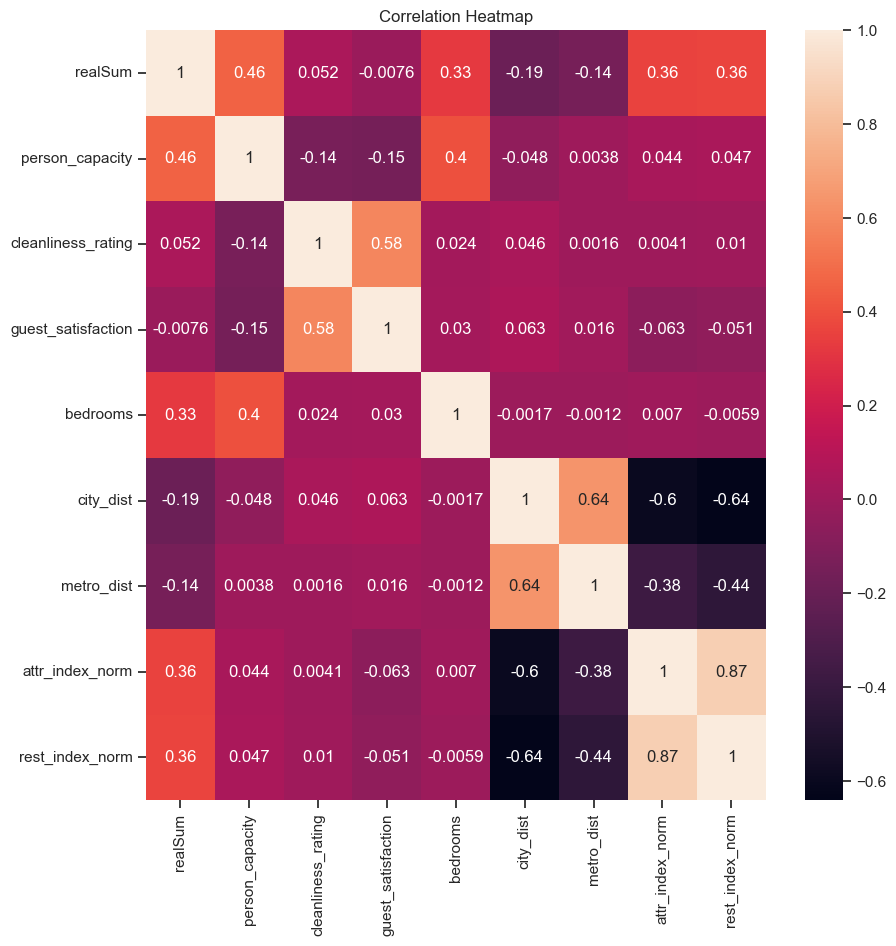

In [72]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

# Set title
ax.set_title('Correlation Heatmap')

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AirbnbBerlin_CorrHeatmap_seaborn.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

### 2.2 Pair Plots

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

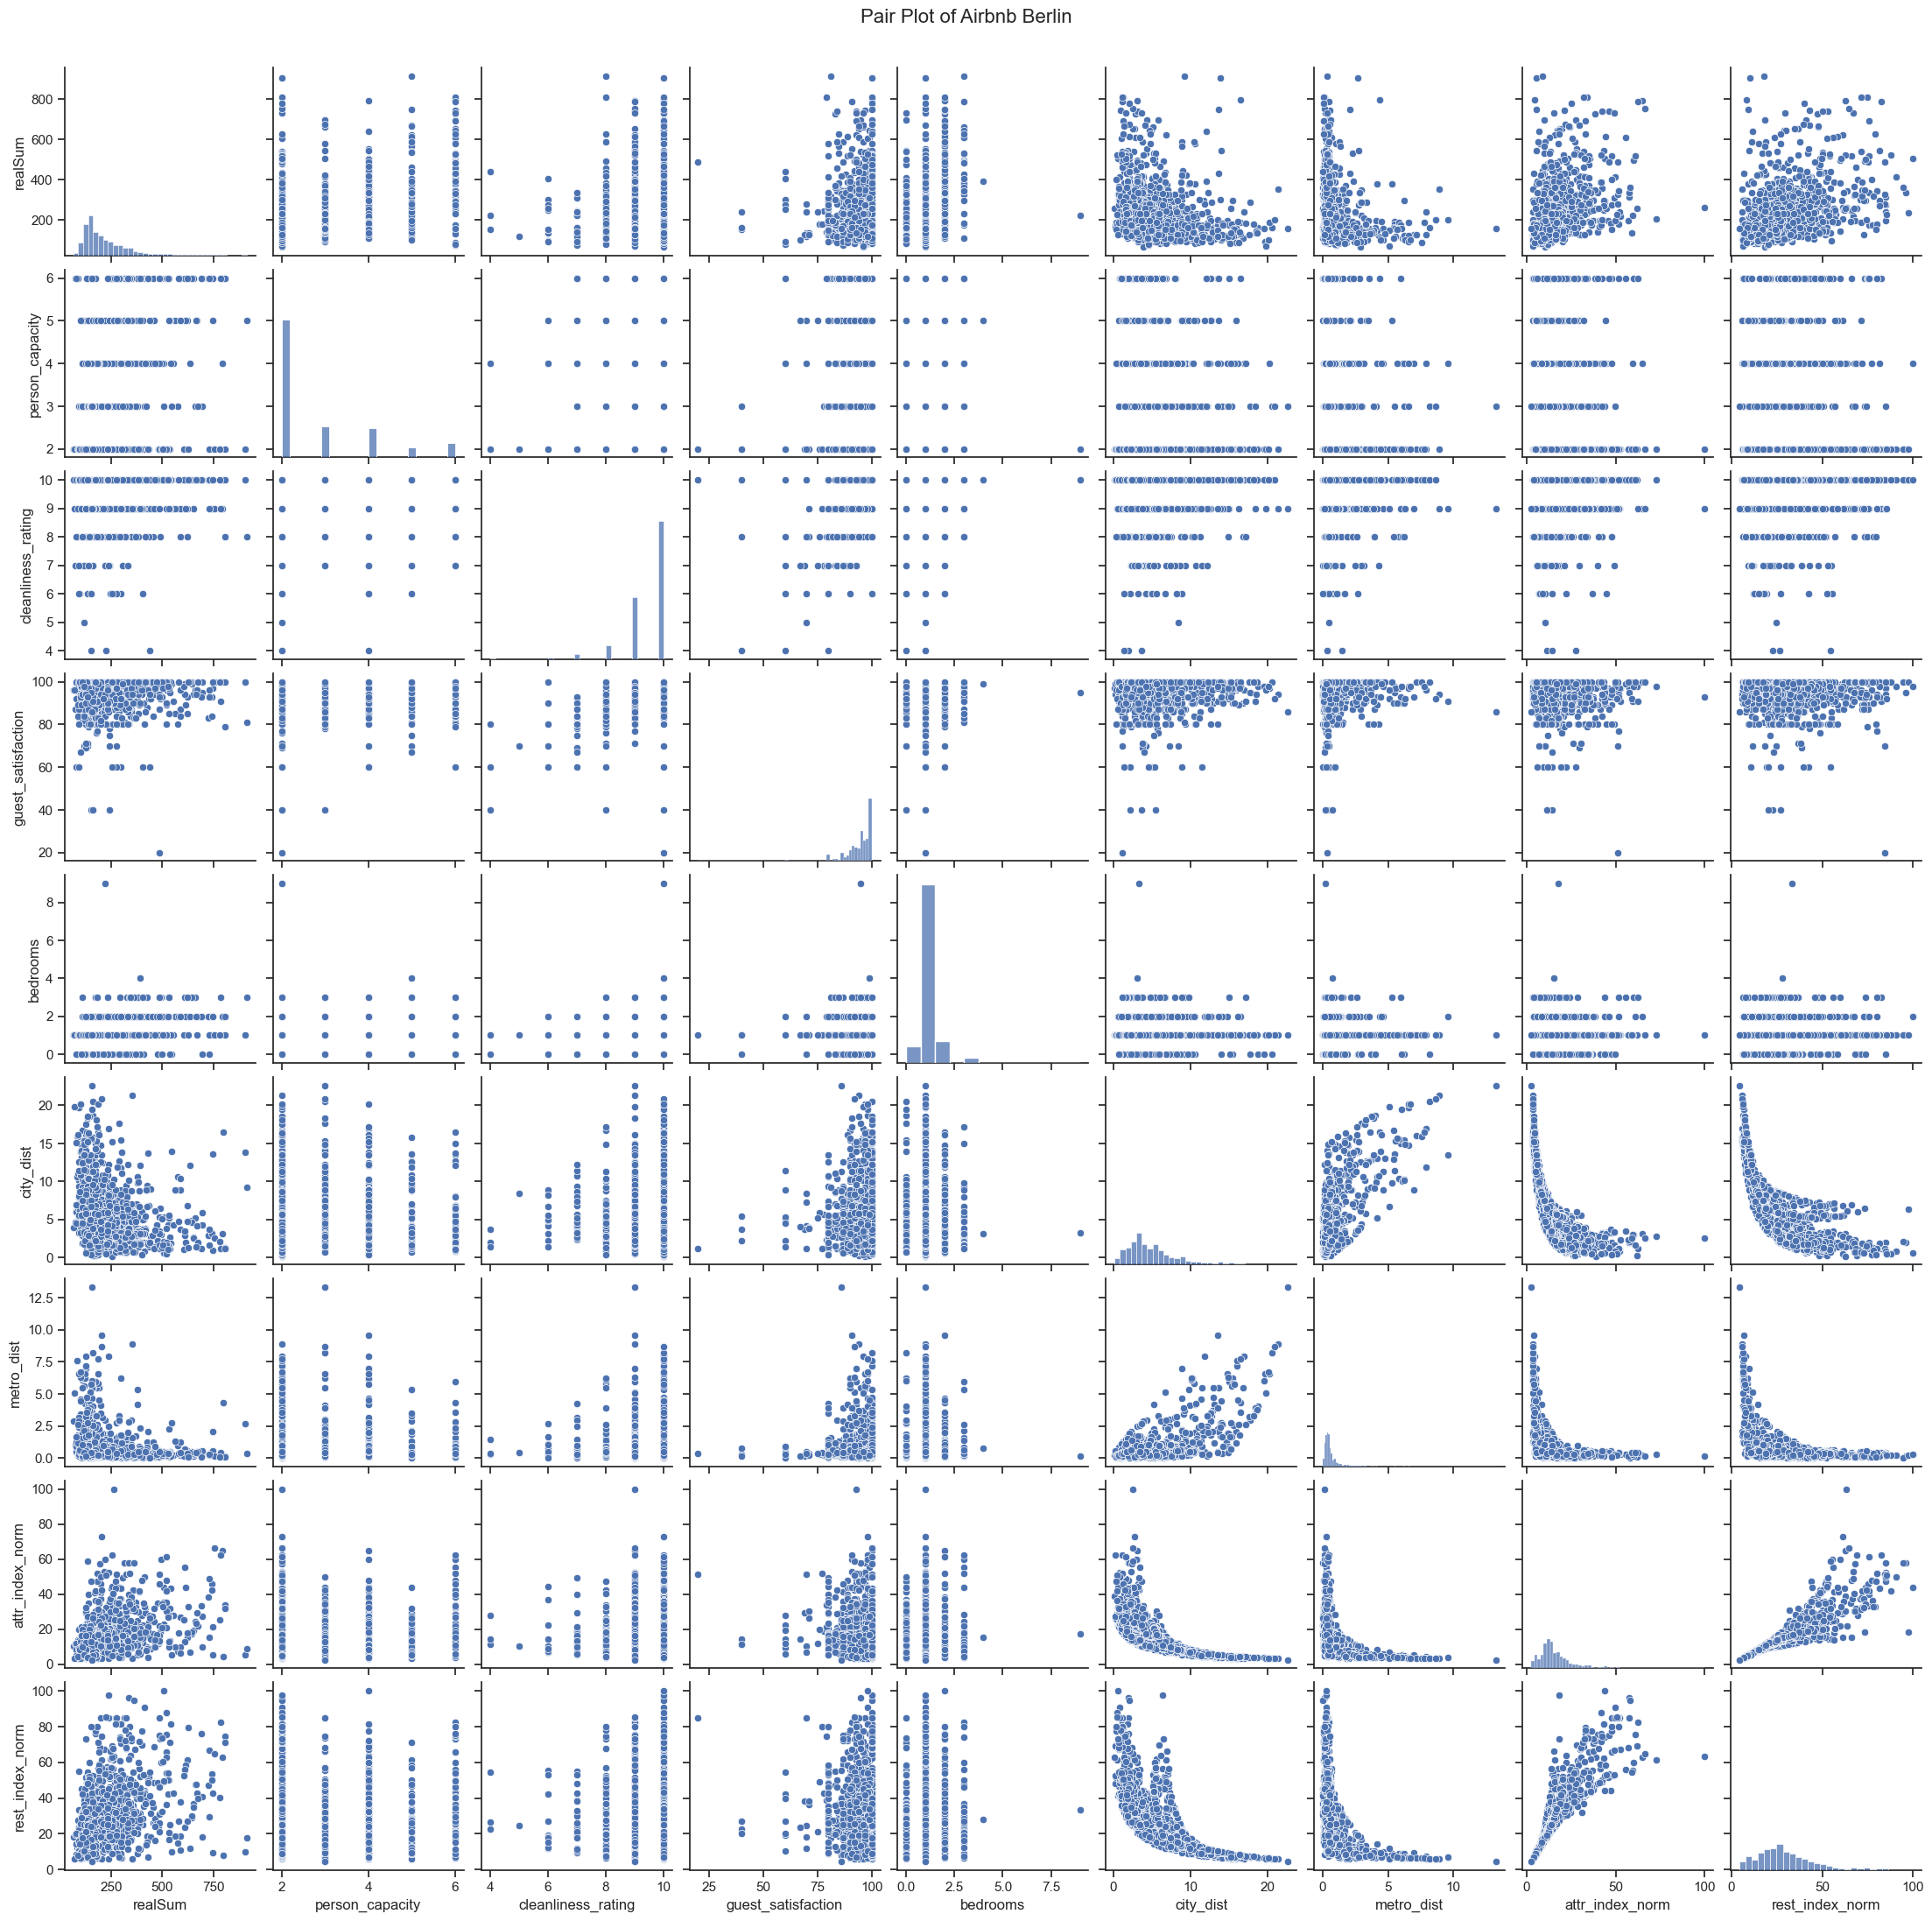

In [73]:
# Create a pair plot 
g = sns.pairplot(df)

# Adding a title to the pair plot
plt.subplots_adjust(top=0.95)  # Adjusting the subplot layout to make room for the title
g.fig.suptitle("Pair Plot of Airbnb Berlin", fontsize=16)  # Adding the title

# Save the plot to an image file (e.g., PNG or PDF)
g.fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AirbnbBerlin_PairPlots.png'))

### 2.3 Scatterplot

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x400 with 0 Axes>

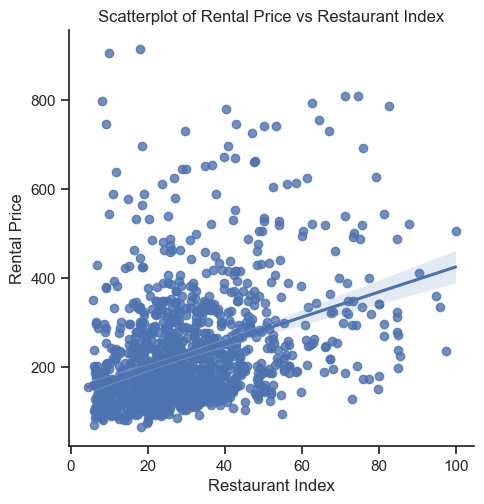

In [113]:
# Set the size of the figure
plt.figure(figsize=(15, 4))  # Adjust the width and height as needed

# Create a scatterplot 
sns.lmplot(x = 'rest_index_norm', y = 'realSum', data = df)

# Set the size of the scatter plot points
scatter_kws = {'s': 1}  # Adjust the 's' parameter to set the size of the points

# Add title
plt.title('Scatterplot of Rental Price vs Restaurant Index')
# Adding titles for x-axis and y-axis
plt.xlabel("Restaurant Index")
plt.ylabel("Rental Price")

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AirbnbBerlin_rental vs restaurant.png'))

# Show the plot
plt.show()

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x400 with 0 Axes>

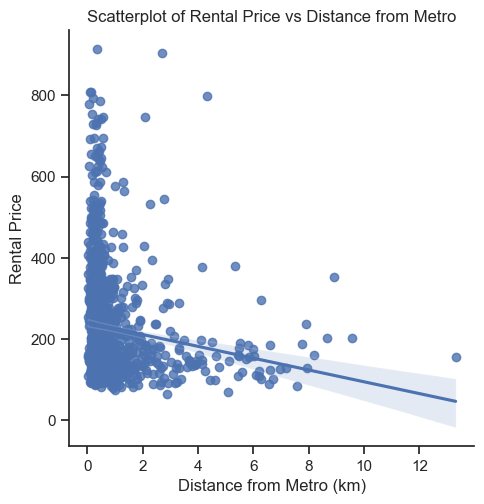

In [114]:
# Set the size of the figure
plt.figure(figsize=(15, 4))  # Adjust the width and height as needed

# Create a scatterplot 
sns.lmplot(x = 'metro_dist', y = 'realSum', data = df)

# Set the size of the scatter plot points
scatter_kws = {'s': 1}  # Adjust the 's' parameter to set the size of the points

# Add title
plt.title('Scatterplot of Rental Price vs Distance from Metro')
# Adding titles for x-axis and y-axis
plt.xlabel("Distance from Metro (km)")
plt.ylabel("Rental Price")

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AirbnbBerlin_rental vs restaurant.png'))

# Show the plot
plt.show()

### 2.4 Categorical Plot

In [13]:
# Create category for rental price
df.loc[df['realSum'] >= 300, 'Rent category'] = 'High'
df.loc[(df['realSum'] > 150)  & (df['realSum'] < 300), 'Rent category'] = 'Mid'
df.loc[df['realSum'] <= 150, 'Rent category'] = 'Low' 

In [14]:
df['Rent category'].value_counts(dropna = False)

Rent category
Mid     649
Low     373
High    254
Name: count, dtype: int64

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


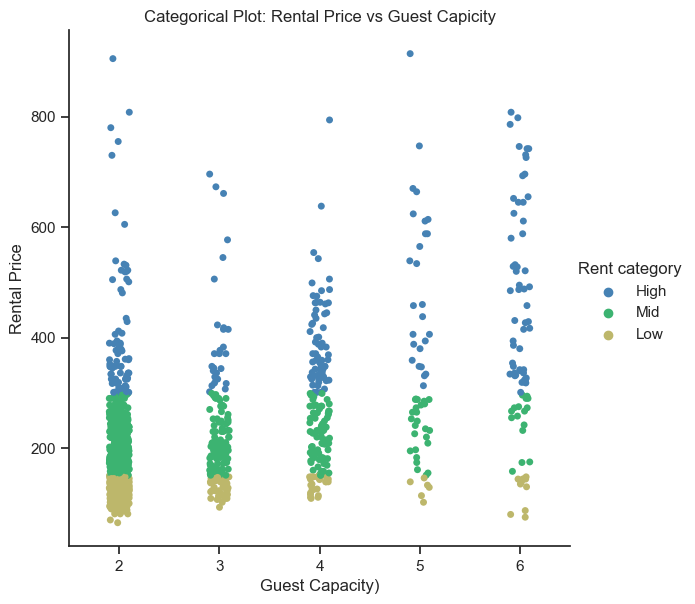

In [16]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="person_capacity", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 1 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Guest Capicity')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Guest Capacity)", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs guest capacity.png'))  

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


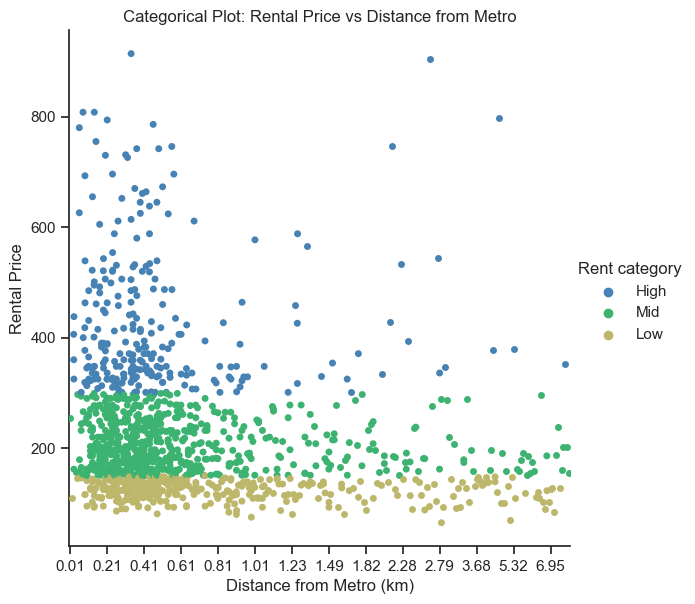

In [102]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="metro_dist", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 20 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Distance from Metro')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Distance from Metro (km)", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs metro.png'))  

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


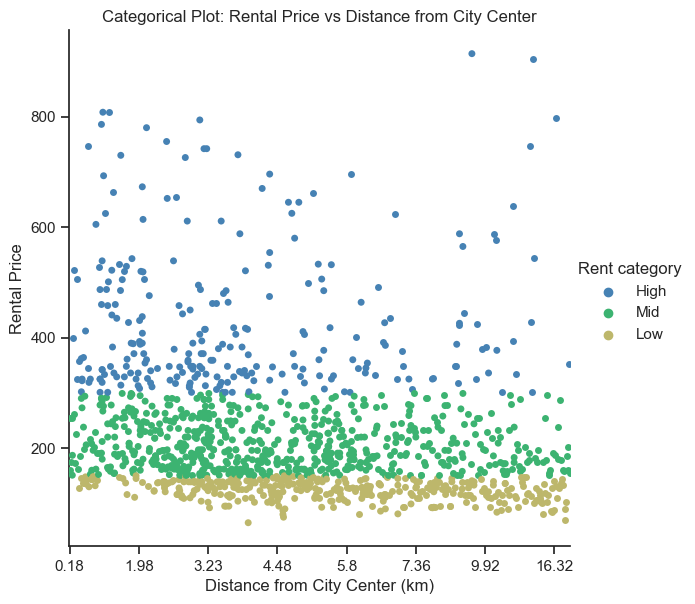

In [107]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="city_dist", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 100 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Distance from City Center')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Distance from City Center (km)", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs city center.png'))  

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


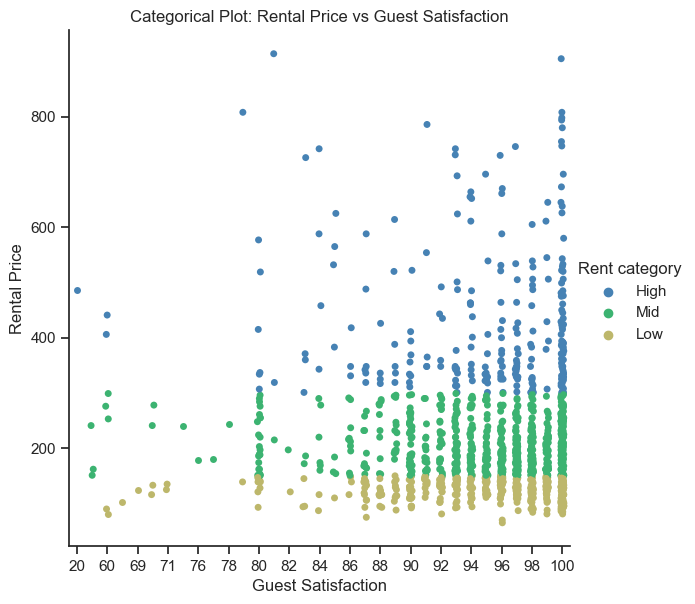

In [99]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="guest_satisfaction", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 2 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Guest Satisfaction')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Guest Satisfaction", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs satisfaction.png'))  

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


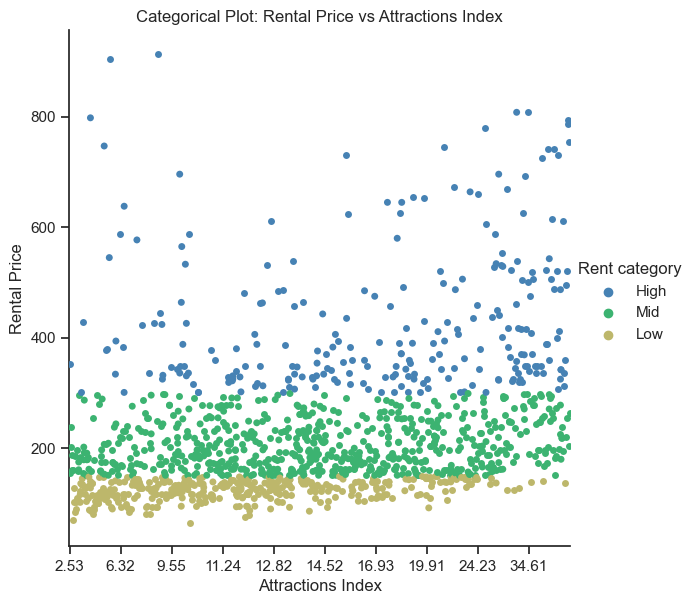

In [101]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="attr_index_norm", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 100 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Attractions Index')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Attractions Index", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs attractions.png'))  

C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksmak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


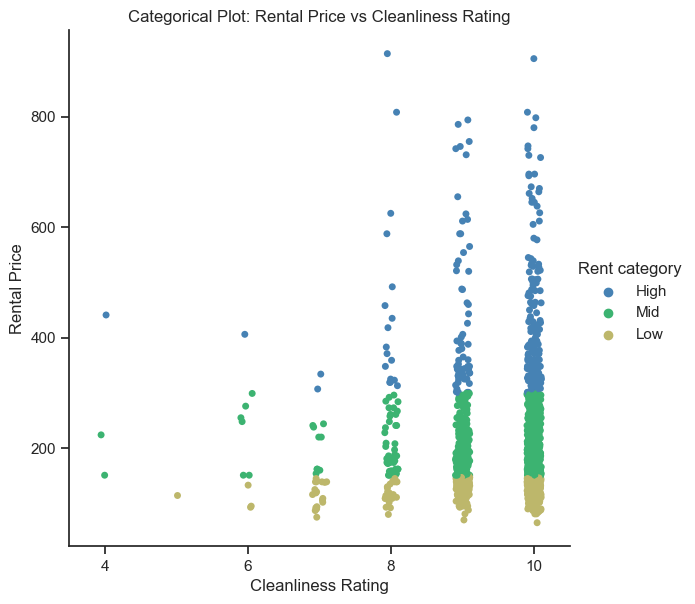

In [105]:
# Define a dictionary mapping rent categories to colors
rent_colors = {"High": "steelblue", "Mid": "mediumseagreen", "Low": "darkkhaki"}

# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="cleanliness_rating", y="realSum", hue="Rent category", hue_order=["High", "Mid", "Low"], 
                data=df, height=6, aspect=1, palette=rent_colors)

## Setting tick interval on the x-axis
tick_interval = 2 # Set your desired tick interval here
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::tick_interval])

# Add title
plt.title('Categorical Plot: Rental Price vs Cleanliness Rating')
# Adding titles for x-axis and y-axis
g.set_axis_labels("Cleanliness Rating", "Rental Price")

# Save the plot to a file (e.g., PNG, PDF, SVG)
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_categorical plot_price vs cleanliness.png'))  

### 2.5 Choropleth Map

In [116]:
# import data file
df1 = pd.read_csv(os.path.join(path, '02 Data', 'Working Data', 'berlin_weekdays.csv'))

In [146]:
df.shape

(1276, 10)

In [117]:
df1.columns

Index(['ID', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction', 'bedrooms', 'city_dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm',
       'long', 'lat'],
      dtype='object')

In [143]:
# Create a data frame with just the states and the values for rating we want plotted
data_to_plot = df1[['long', 'lat', 'ID', 'realSum', 'bedrooms', 'guest_satisfaction']]
data_to_plot.head()

long       lat  ID  realSum  bedrooms  guest_satisfaction
0  13.42344  52.49150   0      186         1                  98
1  13.46800  52.51900   1      195         1                  86
2  13.47096  52.51527   2      176         1                  91
3  13.42281  52.53139   3      208         1                  97
4  13.52440  52.47842   4      151         1                  99

In [144]:
# Create a map centered around the average latitude and longitude of your data
map = folium.Map(location=[data_to_plot['lat'].mean(), data_to_plot['long'].mean()], zoom_start=10)

# Add markers for each property with price as popup
for index, row in data_to_plot.iterrows():
    popup_text = f"ID: {row['ID']}<br>Price: €{row['realSum']}, <br>Bedrooms: {row['bedrooms']}, <br>Satisfaction: {row['guest_satisfaction']}"
    folium.Marker(location=[row['lat'], row['long']], popup=popup_text).add_to(map)
    
map

## 3. Supervised ML Regression Analysis

### 3.1 Check for outliers

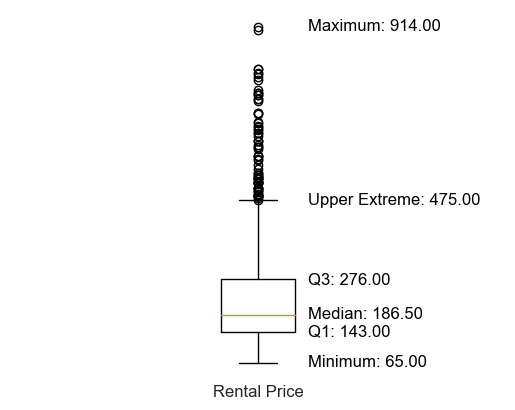

In [181]:
# Assuming df is your DataFrame
data = df['realSum']

# Create boxplot
plt.boxplot(data1)

# Calculate statistics
minimum = data1.min()
q1 = data1.quantile(0.25)
median = data1.median()
q3 = data1.quantile(0.75)
maximum = data1.max()
lower_extreme = data1[data1 >= q1 - 1.5 * (q3 - q1)].min()
upper_extreme = data1[data1 <= q3 + 1.5 * (q3 - q1)].max()

# Add annotations for minimum, Q1, median, Q3, maximum, lower extreme, and upper extreme
plt.text(1.1, minimum, f'Minimum: {minimum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q1, f'Q1: {q1:.2f}', ha='left', va='center', color='black')
plt.text(1.1, median, f'Median: {median:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center', color='black')
plt.text(1.1, maximum, f'Maximum: {maximum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, upper_extreme, f'Upper Extreme: {upper_extreme:.2f}', ha='left', va='center', color='black')

# Remove the border of the figure
plt.box(False)  # or plt.axis('off')

# Hide ticks and labels on the y-axis
plt.yticks([])
plt.xticks([])

# Add labels and title
plt.xlabel('Rental Price')

# Save the plot to a file (e.g., PNG, PDF, SVG)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_box plots rental price.png'))  

# Show the plot
plt.show()

In [189]:
data1 = df['city_dist']
data2 = df['metro_dist']
data3 = df['attr_index_norm']
data4 = df['rest_index_norm']
data5 = df['guest_satisfaction']

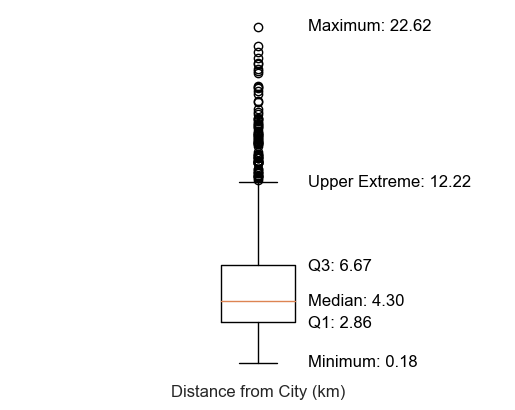

In [193]:
# Assuming df is your DataFrame
data1 = df['city_dist']

# Create boxplot
plt.boxplot(data1)

# Calculate statistics
minimum = data1.min()
q1 = data1.quantile(0.25)
median = data1.median()
q3 = data1.quantile(0.75)
maximum = data1.max()
lower_extreme = data1[data1 >= q1 - 1.5 * (q3 - q1)].min()
upper_extreme = data1[data1 <= q3 + 1.5 * (q3 - q1)].max()

# Add annotations for minimum, Q1, median, Q3, maximum, lower extreme, and upper extreme
plt.text(1.1, minimum, f'Minimum: {minimum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q1, f'Q1: {q1:.2f}', ha='left', va='center', color='black')
plt.text(1.1, median, f'Median: {median:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center', color='black')
plt.text(1.1, maximum, f'Maximum: {maximum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, upper_extreme, f'Upper Extreme: {upper_extreme:.2f}', ha='left', va='center', color='black')

# Remove the border of the figure
plt.box(False)  # or plt.axis('off')

# Hide ticks and labels on the y-axis
plt.yticks([])
plt.xticks([])

# Add labels and title
plt.xlabel('Distance from City (km)')

# Save the plot to a file (e.g., PNG, PDF, SVG)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_box plots_city.png'))  

# Show the plot
plt.show()

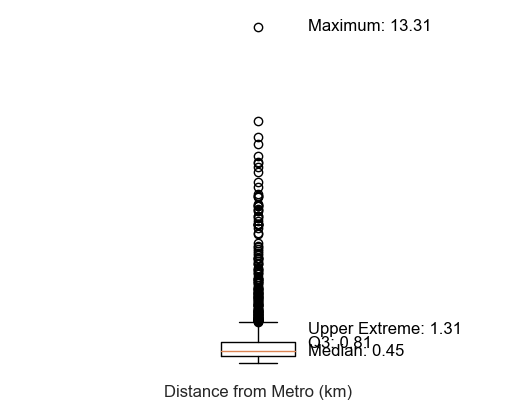

In [195]:
# Assuming df is your DataFrame
data2 = df['metro_dist']

# Create boxplot
plt.boxplot(data2)

# Calculate statistics
minimum = data2.min()
q1 = data2.quantile(0.25)
median = data2.median()
q3 = data2.quantile(0.75)
maximum = data2.max()
lower_extreme = data2[data1 >= q1 - 1.5 * (q3 - q1)].min()
upper_extreme = data2[data1 <= q3 + 1.5 * (q3 - q1)].max()

# Add annotations for minimum, Q1, median, Q3, maximum, lower extreme, and upper extreme
plt.text(1.1, median, f'Median: {median:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center', color='black')
plt.text(1.1, maximum, f'Maximum: {maximum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, upper_extreme, f'Upper Extreme: {upper_extreme:.2f}', ha='left', va='center', color='black')

# Remove the border of the figure
plt.box(False)  # or plt.axis('off')

# Hide ticks and labels on the y-axis
plt.yticks([])
plt.xticks([])

# Add labels and title
plt.xlabel('Distance from Metro (km)')

# Save the plot to a file (e.g., PNG, PDF, SVG)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_box plots_metro.png'))  

# Show the plot
plt.show()

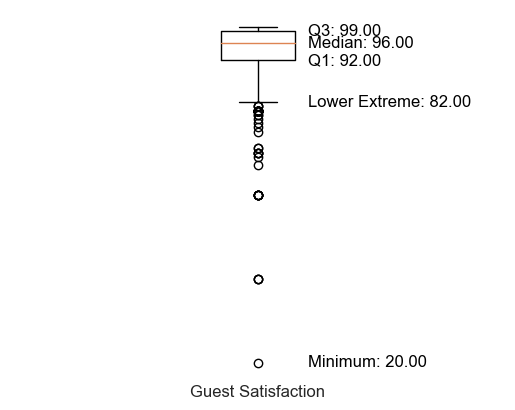

In [198]:
# Assuming df is your DataFrame
data1 = df['guest_satisfaction']

# Create boxplot
plt.boxplot(data1)

# Calculate statistics
minimum = data1.min()
q1 = data1.quantile(0.25)
median = data1.median()
q3 = data1.quantile(0.75)
maximum = data1.max()
lower_extreme = data1[data1 >= q1 - 1.5 * (q3 - q1)].min()
upper_extreme = data1[data1 <= q3 + 1.5 * (q3 - q1)].max()

# Add annotations for minimum, Q1, median, Q3, maximum, lower extreme, and upper extreme
plt.text(1.1, minimum, f'Minimum: {minimum:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q1, f'Q1: {q1:.2f}', ha='left', va='center', color='black')
plt.text(1.1, median, f'Median: {median:.2f}', ha='left', va='center', color='black')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center', color='black')
plt.text(1.1, lower_extreme, f'Lower Extreme: {lower_extreme:.2f}', ha='left', va='center', color='black')

# Remove the border of the figure
plt.box(False)  # or plt.axis('off')

# Hide ticks and labels on the y-axis
plt.yticks([])
plt.xticks([])

# Add labels and title
plt.xlabel('Guest Satisfaction')

# Save the plot to a file (e.g., PNG, PDF, SVG)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Airbnd Berlin_box plots_guest satisfaction.png'))  

# Show the plot
plt.show()

### 3.2 Data prep for regression analysis

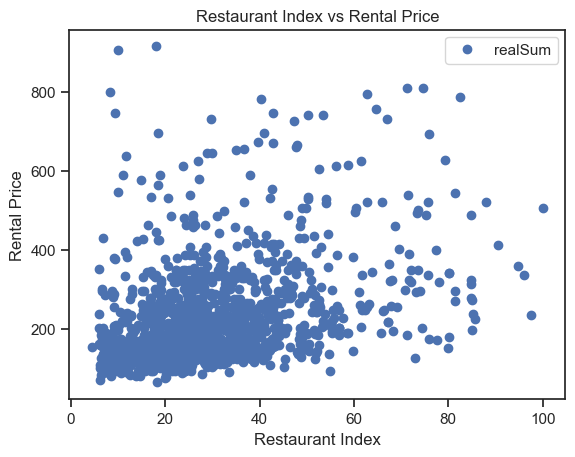

In [199]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'rest_index_norm', y='realSum',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Restaurant Index vs Rental Price')  
plt.xlabel('Restaurant Index')  
plt.ylabel('Rental Price')  
plt.show()

In [200]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['rest_index_norm'].values.reshape(-1,1)
y = df['realSum'].values.reshape(-1,1)

In [201]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.3 Regression analysis: Rental price vs Restaurant index

In [203]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [204]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [205]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

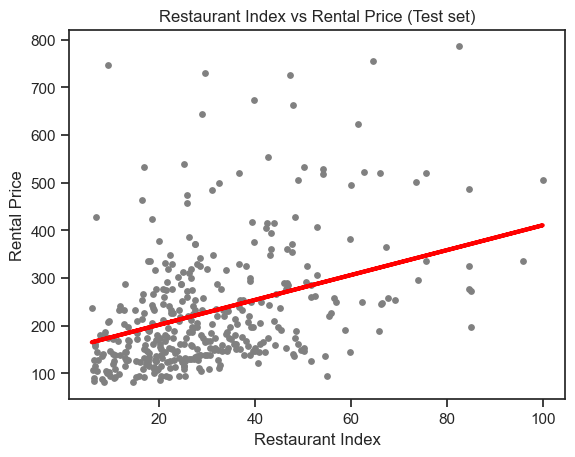

In [206]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Restaurant Index vs Rental Price (Test set)')
plot_test.xlabel('Restaurant Index')
plot_test.ylabel('Rental Price')

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'restaurant vs price (Test set).png'), dpi=300, bbox_inches='tight')
plot_test.show()

In [207]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [211]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Model Summary Statistics:Restaurant Index vs Rental Price (Test set)')
print('------------------------')
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Model Summary Statistics:Restaurant Index vs Rental Price (Test set)
------------------------
Slope: [[2.61039602]]
Mean squared error:  13353.379303035614
R2 score:  0.18127052709649838


In [215]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

Actual   Predicted
0     123  206.527039
1     415  260.953796
2     191  302.981171
3     280  271.760835
4     188  276.668380
5     520  322.010958
6     109  193.214019
7     194  196.477014
8     125  200.235984
9     141  176.899044

### 3.5 Compare how the regression fits the training set

In [216]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

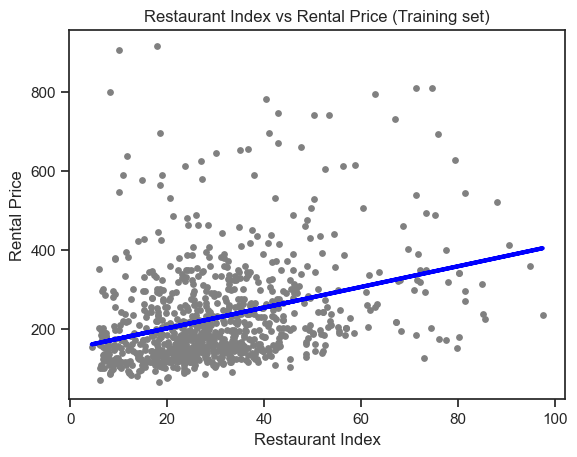

In [230]:
# Create a plot that shows the regression line from the model on the training set.
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Restaurant Index vs Rental Price (Training set)')
plot_test.xlabel('Restaurant Index')
plot_test.ylabel('Rental Price')
plot_test.show()

In [217]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [218]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Model Summary Statistics:Restaurant Index vs Rental Price (Training set)')
print('------------------------')
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Model Summary Statistics:Restaurant Index vs Rental Price (Training set)
------------------------
Slope: [[2.61039602]]
Mean squared error:  14584.842671389153
R2 score:  0.10888858870137363


In [ ]:
Model Summary Statistics:Restaurant Index vs Rental Price (Test set)
------------------------
Slope: [[2.61039602]]
Mean squared error:  13353.379303035614
R2 score:  0.18127052709649838

R2 Score for test set (0.18) is higher better than training set (0.10). The model is not overfitted.

In [250]:
# Clean the extreme values 
df_cut = df[(df['realSum'] <= 500) & (df['metro_dist'] <= 3) & (df['city_dist'] <= 15) & (df['guest_satisfaction'] >= 60)]

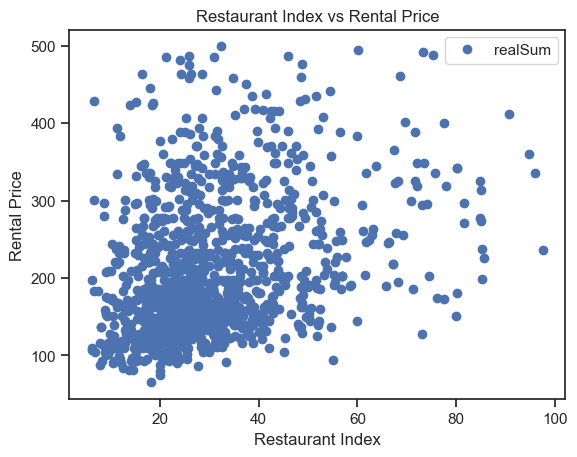

In [251]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_cut.plot(x = 'rest_index_norm', y='realSum',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Restaurant Index vs Rental Price')  
plt.xlabel('Restaurant Index')  
plt.ylabel('Rental Price')  
plt.show()

In [252]:
# Reshape again.

X_2 = df_cut['rest_index_norm'].values.reshape(-1,1)
y_2 = df_cut['realSum'].values.reshape(-1,1)

In [253]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [254]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [255]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [256]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [257]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Model Summary Statistics:Test set (without outliers)')
print('------------------------')
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Model Summary Statistics:Test set (without outliers)
------------------------
Slope: [[1.80197117]]
Mean squared error:  6357.438443666291
R2 score:  0.1484752629242222


In [ ]:
Model Summary Statistics:Restaurant Index vs Rental Price (Test set)
------------------------
Slope: [[2.61039602]]
Mean squared error:  13353.379303035614
R2 score:  0.18127052709649838

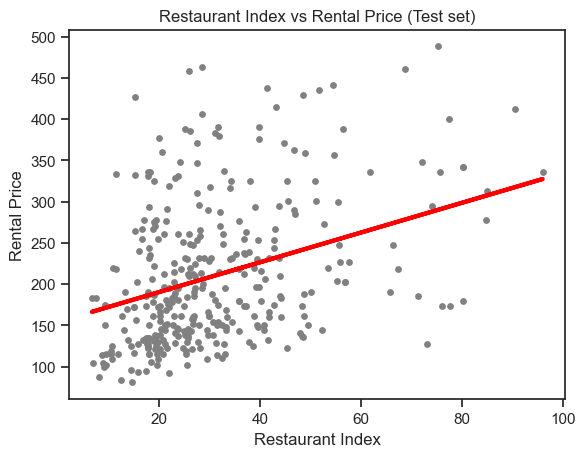

In [258]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Restaurant Index vs Rental Price (Test set)')
plot_test.xlabel('Restaurant Index')
plot_test.ylabel('Rental Price')

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'restaurant vs price (Test set without outliers).png'), dpi=300, bbox_inches='tight')
plot_test.show()

## 4. Unsupervised ML Clustering Analysis

### 4.1The elbow technique

In [259]:
df_cut.columns

Index(['realSum', 'person_capacity', 'cleanliness_rating',
       'guest_satisfaction', 'bedrooms', 'city_dist', 'metro_dist',
       'attr_index_norm', 'rest_index_norm', 'clusters'],
      dtype='object')

In [261]:
df=df_cut.drop(columns = ['clusters'])

In [263]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [264]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-9132259.804376371,
 -2950416.474457225,
 -1643757.2747862544,
 -1135589.2733722688,
 -857615.2795117714,
 -712148.6716908911,
 -625238.3246311081,
 -571874.0209475852,
 -511926.08504606143]

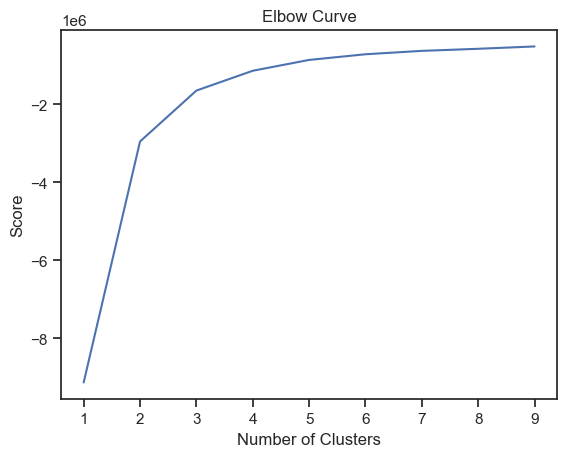

In [265]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4.2 k-means clustering

In [266]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [267]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [268]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [269]:
df.head()

realSum  person_capacity  cleanliness_rating  guest_satisfaction  bedrooms  \
0      186                2                  10                  98         1   
1      195                5                   9                  86         1   
2      176                2                   9                  91         1   
3      208                3                  10                  97         1   
4      151                2                  10                  99         1   

   city_dist  metro_dist  attr_index_norm  rest_index_norm  clusters  
0       3.58        0.17            16.02            30.71         4  
1       3.53        0.51            11.49            21.95         4  
2       3.80        0.28            11.23            21.74         4  
3       0.98        0.71            20.31            40.87         4  
4       8.87        2.19             6.08            10.52         1

In [270]:
df['clusters'].value_counts()

clusters
1    369
4    319
0    216
3    159
2     67
Name: count, dtype: int64

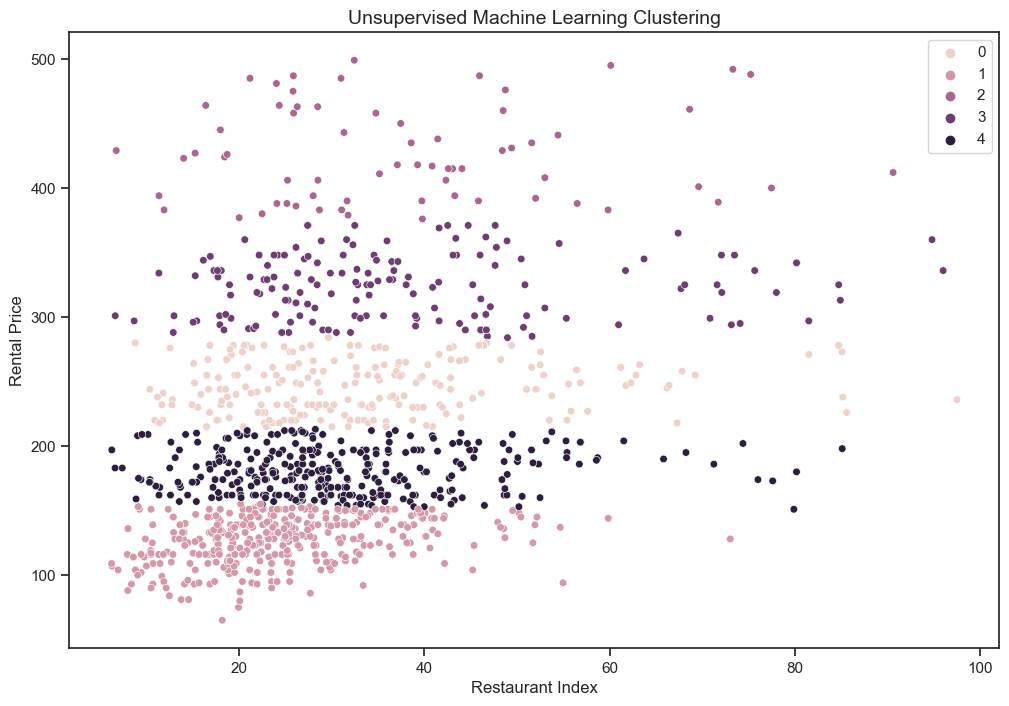

In [271]:
# Plot the clusters for the "price" and "restaurant index".

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rest_index_norm'], y=df['realSum'], hue=kmeans.labels_, s=30) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Restaurant Index') # Label x-axis.
plt.ylabel('Rental Price') # Label y-axis.

# add title
plt.title('Unsupervised Machine Learning Clustering', fontsize=14) 

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'restaurant vs price-UML.png'), dpi=300, bbox_inches='tight')

plt.show()


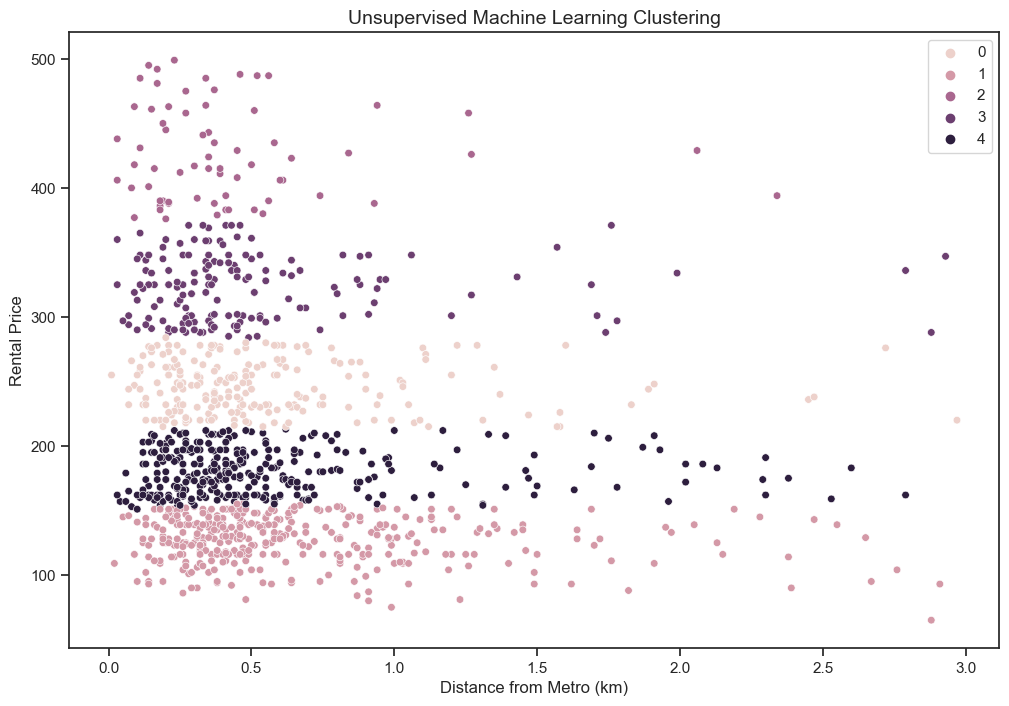

In [272]:
# Plot the clusters for the "price" and "metro_dist".

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['metro_dist'], y=df['realSum'], hue=kmeans.labels_, s=30) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Metro (km)') # Label x-axis.
plt.ylabel('Rental Price') # Label y-axis.

# add title
plt.title('Unsupervised Machine Learning Clustering', fontsize=14) 

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'metro vs price-UML.png'), dpi=300, bbox_inches='tight')

plt.show()

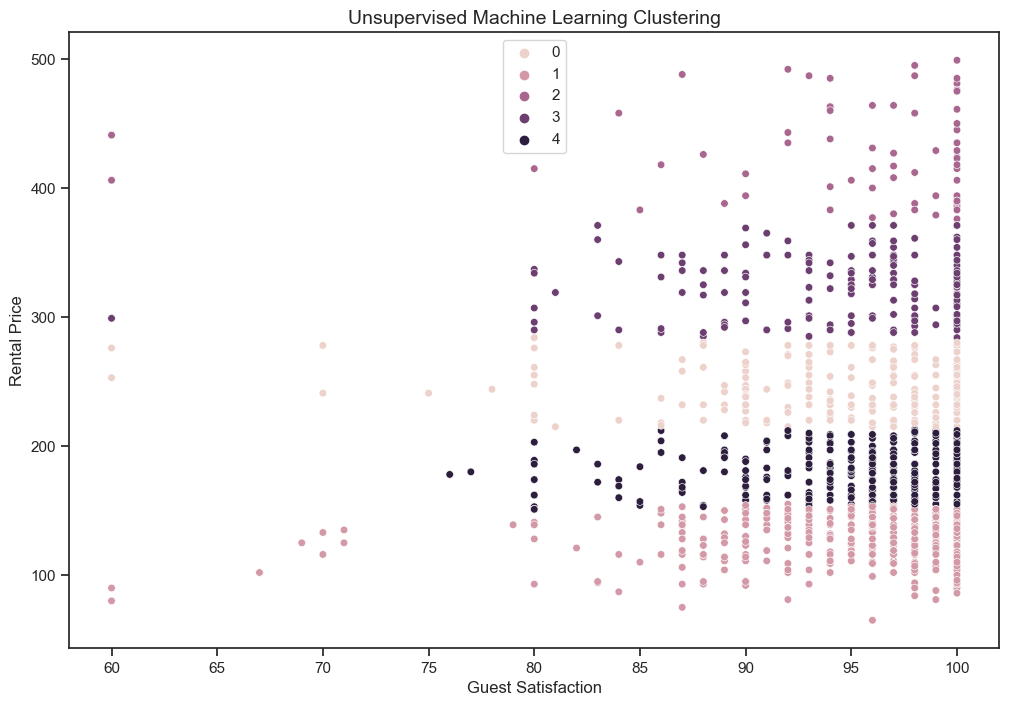

In [273]:
# Plot the clusters for the "price" and "metro_dist".

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['guest_satisfaction'], y=df['realSum'], hue=kmeans.labels_, s=30) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Guest Satisfaction') # Label x-axis.
plt.ylabel('Rental Price') # Label y-axis.

# add title
plt.title('Unsupervised Machine Learning Clustering', fontsize=14) 

# Save the plot to an image file (e.g., PNG or PDF)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'satisfaction vs price-UML.png'), dpi=300, bbox_inches='tight')

plt.show()

### 4.3 Standardized Data

In [274]:
df=df.drop(columns=['clusters'])

In [276]:
## create the scaler 
ss = StandardScaler() 

# apply the scaler to the dataframe subset 
df_scaled = ss.fit_transform(df)

In [277]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [278]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ksmak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-10169.999999999993,
 -8341.004401022743,
 -7272.445874737008,
 -6409.933079860315,
 -5695.780629293673,
 -5269.387217272171,
 -4960.969303593274,
 -4685.573921638771,
 -4475.744096038975]

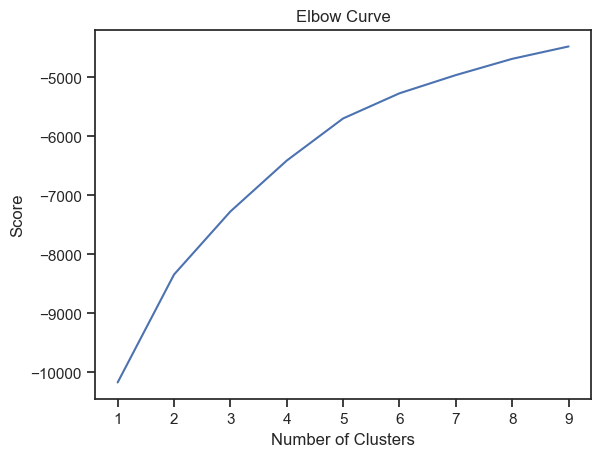

In [279]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()